In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
np.set_printoptions(threshold=sys.maxsize)

In [3]:
def stp(control,target,n):
    aux = QuantumRegister(n-1)
    i=2
    j=0
    c=0
    
    qcirc1 = QuantumCircuit(control,aux,target)
    qcirc1.ccx(control[0],control[1],aux[0])
    
    for c in range(0,n-2):
        qcirc1.ccx(control[i],aux[j],aux[j+1])
        i+=1
        j+=1
        c+=1
    qcirc1.cx(aux[j],target[0])
    i-=1
    j-=1   
    while c>0:
        qcirc1.ccx(control[i],aux[j],aux[j+1])
        i-=1
        j-=1
        c-=1
    qcirc1.ccx(control[0],control[1],aux[0])

    return qcirc1

In [4]:
def stpinv(control,target,n):
    m = n-1
    anc = QuantumRegister(m)
    i = 2
    j = m-1    
    qcirc1 = QuantumCircuit(target,anc,control)
    qcirc1.ccx(control[0],control[1],anc[j])
    
    for c in range(0,n-2):
        qcirc1.ccx(control[i],anc[j],anc[j-1])
        i+=1
        j-=1
        
    qcirc1.cx(anc[0],target[0])
    
    i-=1
    j+=1
    c+=1
    while c>0:
        qcirc1.ccx(control[i],anc[j],anc[j-1])
        i-=1
        j+=1
        c-=1
    j-=1
    qcirc1.ccx(control[0],control[1],anc[j])
    return qcirc1

In [4]:
def cnx(qc,*qubits):
    if len(qubits) >= 3:
        last = qubits[-1]
        #A matrix: (made up of a  and Y rotation, lemma4.3)
        qc.crz(np.pi/2, qubits[-2], qubits[-1])
        #cry
        qc.cu3(np.pi/2, 0, 0, qubits[-2],qubits[-1])
        
        #Control not gate
        cnx(qc,*qubits[:-2],qubits[-1])
        
        #B matrix (cry again, but opposite angle)
        qc.cu3(-np.pi/2, 0, 0, qubits[-2], qubits[-1])
        
        #Control
        cnx(qc,*qubits[:-2],qubits[-1])
        
        #C matrix (final rotation)
        qc.crz(-np.pi/2,qubits[-2],qubits[-1])
    elif len(qubits)==3:
        qc.ccx(*qubits)
    elif len(qubits)==2:
        qc.cx(*qubits)

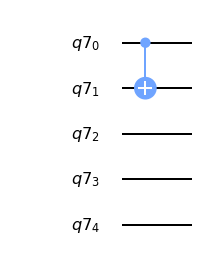

In [11]:
qreg= QuantumRegister(5)
qc = QuantumCircuit(qreg)

cnx(qc,qreg[0],qreg[1])

qc.draw(output='mpl')